# ANÁLISIS EXPLORATORIO DE LA INDUSTRIA DE LOS VIDEOJUEGOS

## INTRODUCCIÓN

LA INDUSTRIA DE LOS VIDEOJUEGOS SE HA CONSOLIDADO COMO UNO DE LOS SECTORES MÁS DINÁMICOS Y RENTABLES DEL ENTRETENIMIENTO DIGITAL, CARACTERIZÁNDOSE POR UNA RÁPIDA EVOLUCIÓN TECNOLÓGICA, UNA ALTA COMPETENCIA ENTRE PLATAFORMAS Y CAMBIOS CONSTANTES EN LAS PREFERENCIAS DE LOS CONSUMIDORES. EN ESTE CONTEXTO, EL ANÁLISIS DE DATOS HISTÓRICOS DE LANZAMIENTOS, VENTAS Y CALIFICACIONES RESULTA FUNDAMENTAL PARA COMPRENDER LAS DINÁMICAS QUE HAN MOLDEADO EL MERCADO A LO LARGO DEL TIEMPO.

EL PRESENTE ESTUDIO TIENE COMO OBJETIVO REALIZAR UN ANÁLISIS EXPLORATORIO DE UN DATASET DE VIDEOJUEGOS, CON EL FIN DE IDENTIFICAR PATRONES RELEVANTES EN LA EVOLUCIÓN TEMPORAL DE LA INDUSTRIA, EL DESEMPEÑO COMERCIAL DE LAS DISTINTAS PLATAFORMAS Y LA DISTRIBUCIÓN REGIONAL DE LAS VENTAS. ASIMISMO, SE EXAMINA EL CICLO DE VIDA DE LAS PLATAFORMAS, EL COMPORTAMIENTO DE TÍTULOS MULTIPLATAFORMA Y LA CONCENTRACIÓN DE VENTAS EN UN REDUCIDO NÚMERO DE VIDEOJUEGOS ALTAMENTE EXITOSOS, FENÓMENO COMÚN EN INDUSTRIAS DE TIPO HIT-DRIVEN.

ADICIONALMENTE, SE INCORPORAN PRUEBAS DE HIPÓTESIS PARA EVALUAR POSIBLES DIFERENCIAS SIGNIFICATIVAS EN LAS CALIFICACIONES PROMEDIO DE LOS USUARIOS ENTRE PLATAFORMAS Y GÉNEROS SELECCIONADOS, PERMITIENDO COMPLEMENTAR EL ANÁLISIS DESCRIPTIVO CON EVIDENCIA ESTADÍSTICA. DE ESTE MODO, EL ESTUDIO BUSCA OFRECER UNA VISIÓN INTEGRAL DEL MERCADO DE LOS VIDEOJUEGOS, DESTACANDO TANTO SUS TENDENCIAS HISTÓRICAS COMO LOS FACTORES QUE INFLUYEN EN SU DESEMPEÑO COMERCIAL Y EN LA PERCEPCIÓN DE LOS USUARIOS.


## 1. IMPORTACIÓN DE LIBRERÍAS Y EL ARCHIVO A TRABAJAR

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">EL PRIMER PASO ES IMPORTAR EL ARCHIVO EN LIBRERÍA PANDAS Y CARGAR LAS LIBRERÍAS QUE SE VAN A UTILIZAR</strong>
</div>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
import pandas as pd
import seaborn as sns
df_videogames=pd.read_csv("/datasets/games.csv")

## 2. PREPARACIÓN DE LOS DATOS

### VISUALIZACIÓN

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">SE OBTUVO LA INFORMACIÓN DEL DATAFRAME PARA SABER CON QUÉ TIPO DE DATOS SE VA A TRABAJAR Y CONOCER LA EXTENSIÓN DEL ARCHIVO, NOMBRES DE COLUMNAS Y DATOS NULOS</strong>
</div>

In [2]:
df_videogames.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df_videogames.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### ESTANDARIZACIÓN DE LOS DATOS: NOMBRE DE LAS COLUMNAS

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">A CONTINUACIÓN SE ESTANDARIZA EL NOMBRE DE LOS COLUMNAS CONVIRTIÉNDOLAS A MÍNUSCULAS Y SE MUESTRA EL RESULTADO</strong>
</div>

In [4]:
df_videogames.columns=df_videogames.columns.str.lower()

In [5]:
df_videogames.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### DATOS AUSENTES

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">SE RELLENAN LOS DATOS AUSENTES DE LA COLUMNA year_of_relase CON EL NÚMERO CERO PARA PODER CAMBIAR EL TIPO DE DATOS A ENTERO. EL RESULTADO SE GUARDA UTILIZANDO INPLACE=TRUE Y SE COMPRUEBA EL NUEVO NÚMERO DE DATOS NULOS</strong>
</div>

In [6]:
df_videogames["year_of_release"].fillna(0, inplace=True)

In [7]:
df_videogames["year_of_release"].isna().sum()


0

### CONVERSIÓN AL TIPO DE DATOS ADECUADO

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">SE CAMBIÓ EL TIPO DE DATO DE FLOAT A ENTERO DE LA COLUMNA year_of_release UTILIZANDO LA FUNCIÓN astype()</strong>
</div>

In [8]:
df_videogames["year_of_release"]=df_videogames["year_of_release"].astype("int")

In [9]:
df_videogames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


### DUPLICADOS

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">VERIFICACIÓN DE DUPLICADOS:</strong>
</div>

In [10]:
df_videogames.duplicated().sum()

0

### DATOS NULOS

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">VISUALIZACIÓN DE DATOS NULOS EN LA COLUMNA name, COINCIDE CON LOS DATOS NULOS DE LA COLUMNA genre</strong>
</div>

In [11]:
df_videogames[df_videogames["name"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN



<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">SE ELIMINAN LOS DATOS NULOS UTILIZANDO LA FUNCIÓN dropna()</strong>
</div>


In [12]:
df_videogames.dropna(subset=['name', 'genre'],inplace=True)

In [13]:
df_videogames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">PROCESAMIENTO DE DATOS NULOS EN LA COLUMNA critic_score</strong>
</div>


In [14]:
df_videogames[df_videogames["critic_score"].isna()] #visualización de datos nulos en la columna de critic_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
df_videogames["critic_score"].mean() #Obtención de la media 

68.96767850559173

In [16]:
df_videogames["critic_score"].median() #Obtención de la media 

71.0

In [17]:
mediana=df_videogames["critic_score"].median() #Obtención de la mediana

In [18]:
df_videogames["critic_score"].fillna(mediana,inplace=True) #Se reemplazan valores nulos con la mediana

In [19]:
df_videogames["critic_score"].isna().sum() #Se comprueba que no haya datos nulos

0

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">PROCESAMIENTO DE DATOS NULOS EN LA COLUMNA user_score</strong>
</div>


In [20]:
print(df_videogames["user_score"].unique()) #valores únicos en la columna user_score. Contiene datos nulos y "tbd"

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [21]:
df_videogames["user_score"] = df_videogames["user_score"].replace("tbd", pd.NA) #se reemplaza el término tdb por NAN

In [22]:
 df_videogames["user_score"] = pd.to_numeric(df_videogames["user_score"], errors='coerce') #se convierte el tipo de datos a numérico

In [23]:
df_videogames["user_score"].mean()

7.125046113306983

In [24]:
median_user_score=df_videogames["user_score"].median() #Existe una enorme diferencia entre la media y la mediana, lo cual significa que hay datos dispersos.

In [25]:
df_videogames["user_score"].fillna(median_user_score, inplace=True) #Se reemplazan los valores nulos con la mediana

In [26]:
df_videogames["user_score"].isna().sum()

0


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">PROCESAMIENTO DE DATOS NULOS EN LA COLUMNA rating</strong>
</div>


In [27]:
df_videogames[df_videogames["rating"].isna()] #Visualización de datos nulos en la columna

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,71.0,7.5,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,71.0,7.5,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,71.0,7.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.5,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.5,NaN


In [28]:
df_videogames["rating"].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [29]:
df_videogames["rating"].fillna("Unkown", inplace=True)

In [30]:
df_videogames["rating"].isna().sum()

0

In [31]:
 df_videogames.info() #Ya están procesados los datos nulos en todo el df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [32]:
df_videogames["total_sales"]=df_videogames["na_sales"]+df_videogames["eu_sales"]+df_videogames["jp_sales"]+df_videogames["other_sales"]

In [33]:
df_videogames.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,Unkown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,Unkown,31.38


## 3. ANÁLISIS DE DATOS

### VIDEOJUEGOS POR AÑO

In [34]:
gamesxyear=df_videogames.groupby(["year_of_release"])["name"].count()#Se crea una variable con los datos de cuántos juegos se lanzaron por año.

In [35]:
print(gamesxyear.sort_values(ascending=False))

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1987      16
1990      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64


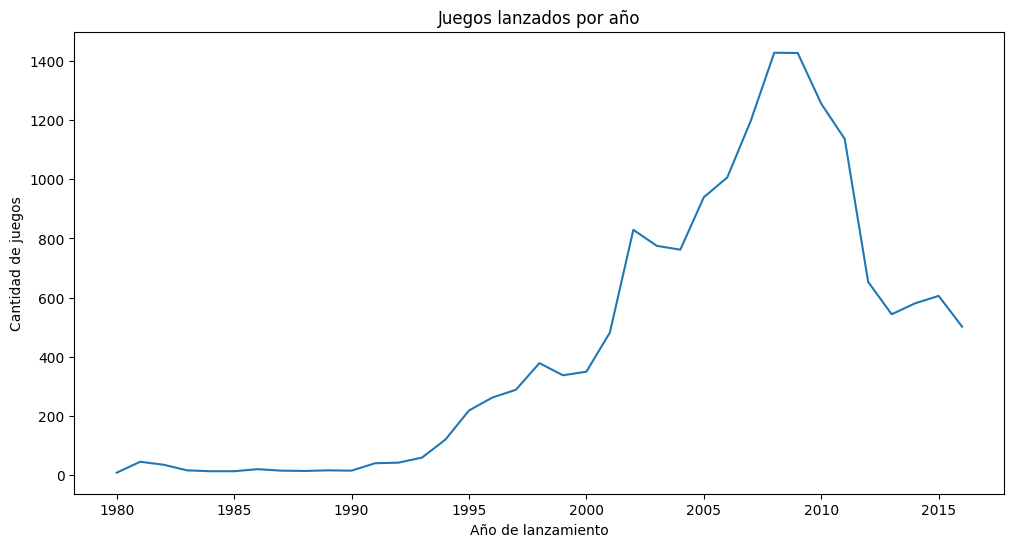

In [36]:
# Filtrar datos sin el año 0
gamesxyear_clean = gamesxyear[gamesxyear.index != 0]
gamesxyear_clean.plot(figsize=(12, 6))
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.title('Juegos lanzados por año')
plt.show()

- - - LOS PRIMEROS JUEGOS REGISTRADOS EN ESTE DATA FRAME CORRESPONDEN AL AÑO 1980, SIN EMBARGO DURANTE EL PÉRIODO 1980 A 1993 NO SE LANZARON MÁS DE 100 JUEGOS. FUE HASTA EL AÑO 1994 QUE EL NÚMERO DE JUEGOS SUPÉRÓ LOS 100 POR AÑO Y HUBO UN PERIODO DE CRECIMIENTO ESTABLE HASTA EL AÑO 2000, YA QUE A PARTIR DE AHÍ CRECIÓ EL NÚMERO DE JUEGOS LANZADOS, ALCANZANDO EL NÚMERO MÁXIMO EN 2008, CON 1400 JUEGOS LANZADOS ESE AÑO. A PARTIR DE ESE PUNTO MÁXIMO COMENZÓ A DISMINUR CONSIDERABLEMENTE EL NÚMERO DE JUEGOS LANZADOS. 

### VENTAS TOTALES POR PLATAFORMA

In [37]:
platform_sales=df_videogames.groupby(["platform"])["total_sales"].sum() #Se crea una variable con los datos de ventas totales por cada plataforma

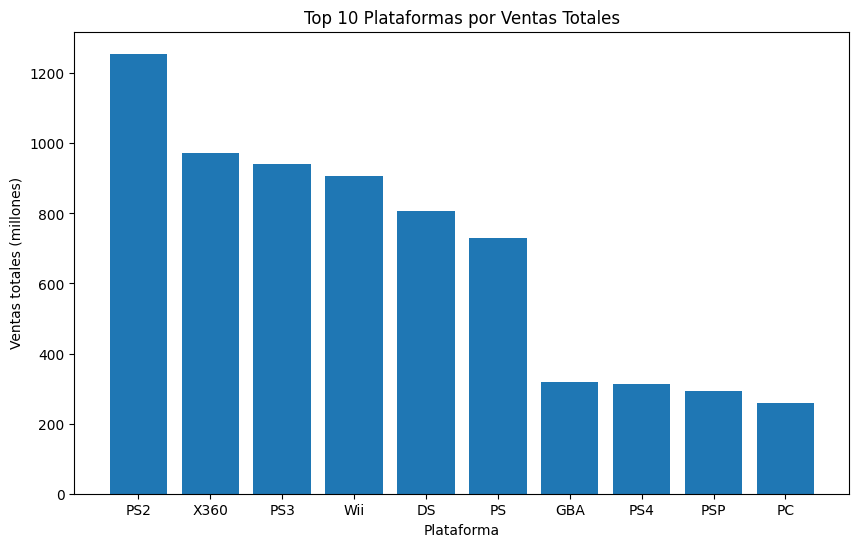

In [38]:
top_platforms = platform_sales.sort_values(ascending=False).head(10)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(top_platforms.index, top_platforms.values)
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')
plt.title('Top 10 Plataformas por Ventas Totales')
plt.show()

- - - EN EL GRÁFICO ANTERIOR SE PUEDE OBSERVAR QUE PS2 ES LA PLATAFORMA LIDER, SIN EMBARGO TODAS LAS VERSIONES DE PLAYSTATION ESTÁN DENTRO DE LAS MÁS VENDIDAS. 
OTRA PLATAFORMA COMPETITIVA ES X360, SEGUIDO DE WII Y DS.
LAS PLATAFORMAS QUE SE ENCUENTRAN EN UN NIVEL SIMILAR SON: GBA,PS4,PSP Y PC.


### VENTAS TOTALES POR PLATAFORMA Y POR AÑO

SE CREA UNA VARIABLE QUE AGRUPA LAS PLATAFORMAS POR AÑO DE LANZAMIENTO Y VENTAS TOTALES. unstack(fill_value=0) CONVIERTE LAS FILAS (PLATAFORMAS) EN COLUMNAS PARA PODER HACER MÁS FÁCIL LA COMPARACIÓN Y EL GRÁFICO. fill_value=0 INDICA QUE SI NO HAY DATOS PARA UNA COMBINACIÓN AÑO-PLATAFORMA EL VALOR ES CERO.

In [43]:
 
platform_year_pivot = df_videogames.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)


SE FILTRAN LOS AÑOS VÁLIDOS, DEJANDO DE LADO LOS VALORES QUE TIENEN AÑO CERO.

In [44]:
platform_year_pivot = platform_year_pivot[platform_year_pivot.index != 0]


In [45]:
top_platforms_list = platform_sales.sort_values(ascending=False).head(5).index


CREACIÓN DEL GRÁFICO DE LÍNEAS (POR DEFECTO). SE UTILIZA UN BUCLE QUE RECORRE CADA PLATAFORMA DE LA LISTA DE 10 MEJORES PLATAFORMAS.
VERIFICA SI LA PLATAFOMA EXISTE COMO COLUMNA EN LA TABLA PIVOTY CREA UN GRÁFICO EN EL CUAL LOS AÑOS VAN EN EL EJE X , LAS VENTAS EN EL EJE Y. marker= "o" COLOCA UN CIRCULO EN CADA PUNTO DE DATOS.
label=platform: Etiqueta para la leyenda
linewidth=2: Grosor de la línea


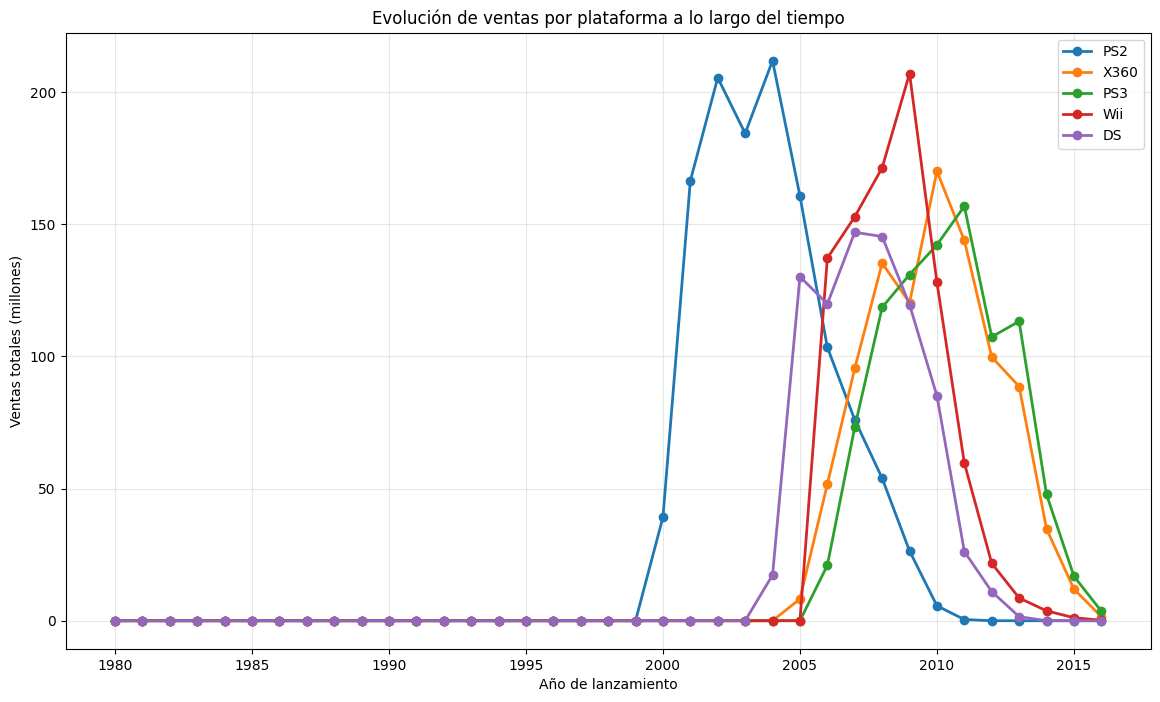

In [46]:
plt.figure(figsize=(14, 8))
for platform in top_platforms_list:
    if platform in platform_year_pivot.columns:
        plt.plot(platform_year_pivot.index, platform_year_pivot[platform], 
                marker='o', label=platform, linewidth=2)

plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.title('Evolución de ventas por plataforma a lo largo del tiempo')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

- - - EN EL GRÁFICO ANTERIOR SE MUESTRA LA EVOLUCIÓN DE LAS VENTAS DE LAS 10 PRINCIPALES PALTAFORMAS. SE OBSERVA QUE LAS PLATAFOMAS TIENEN UNA TENDENCIA A ESTAR ACTIVAS DURANTE 10 AÑOS, APROXIMADAMENTE.
PS2 COMEZÓ CON UN ALTO VALOR DE VENTAS EN SU PRIMER AÑO (2000) E INCREMENTÓ SIGNIFICATIVAMENTE EL SEGUNDO AÑO, SIENDO EL PUNTO MÁS ALTO EL 2004 (QUINTO AÑO) Y A PARTIR DE AHÍ COMENZARON A DISMINUIR LAS VENTAS HASTA EL 2010. AL MISMO TIEMPO EN QUE LAS VENTAS DE PS2 IBAN EN DECLIVE, LA PLATAFORMA WII COMENZABA A REGISTRAR VENTAS ALTAS EN 2005 AUNQUE NO LOGRÓ SUPERAR EL MÁXIMO DE VENTAS DE LA PLATAFORMA PS2. EL PICO MÁS ALTO DE VENTAS DE WII SE REGISTRÓ EN 2009 (CUARTO AÑO). AL IGUAL QUE LAS DEMÁS PLATAFORMAS, DESDE EL PUNTO MÁS ALTO SIGUIÓ EL DECLIVE EN LAS VENTAS, HASTA 2014.
POR OTRO LADO, LAS PLATAFORMAS X360 Y PS3 TUVIERON UN COMPORTAMINENTO MUY SIMILAR EN CUANTO A TIEMPO DE VIDA Y VENTAS, DESDE 2005 A 2016, REGISTRANDO PUNTO MÁXIMO DE VENTAS SU SEXTO AÑO.
LA PLATAFORMA PS4 ESTÁ EN FASE DE DISMINUCIÓN DE VENTAS, HABIENDO ALCANZADO SU PUNTO MÁXIMO EN 2015.

DERIVADO DE LAS OBSERVACIONES ANTERIORES, SE CONCLUYE QUE ES CONVENIENTE TOMAR DATOS DE 10 AÑOS PARA CONSTRUIR UN MODELO PARA 2017

### VENTAS GLOBALES DE VIDEOJUEGOS POR PLATAFORMA

In [47]:
ventas_globales=df_videogames.groupby(["name","platform"])["total_sales"].sum().reset_index()

In [48]:
plataformas=ventas_globales[ventas_globales["platform"].isin(top_platforms_list)].set_index(["name","platform"]).unstack().reset_index()

In [49]:
plataformas.columns=["name","DS","PS2","PS3","Wii","x360"]

In [50]:
plataformas["numero_plataformas"]=plataformas[["DS","PS2","PS3","Wii","x360"]].notna().sum(axis=1)

In [51]:
plataformas["ventas_totales"]=plataformas[["DS","PS2","PS3","Wii","x360"]].sum(axis=1)

In [52]:
plataformas=plataformas.sort_values(["ventas_totales","numero_plataformas"],ascending=False)

In [53]:
top_5_juegos=plataformas[plataformas["numero_plataformas"]>1].head().fillna(0)

In [54]:
top_5_juegos=top_5_juegos.set_index("name")[["DS","PS2","PS3","Wii","x360"]].stack().reset_index()

In [55]:
top_5_juegos.columns=["name","platform","ventas"]

<AxesSubplot:xlabel='ventas', ylabel='name'>

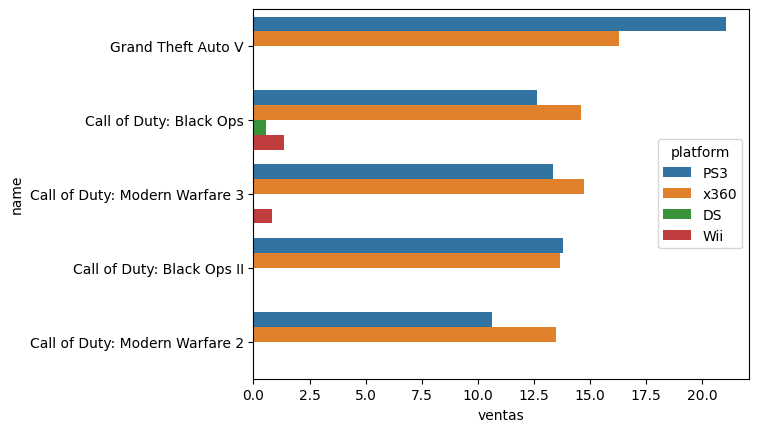

In [56]:
sns.barplot(data=top_5_juegos[top_5_juegos["ventas"]>0],y="name",x="ventas",hue="platform")

- - - EN EL GRÁFICO ANTERIOR SE MUESTRA EL TOP 5 DE VIDEOJUEGOS QUE SE ENCUENTRAN DISPONIBLES EN MÁS DE UNA PLATAFORMA Y SE COMPARA EL TOTAL DE VENTAS DE UN MISMO JUEGO EN LAS DIFERENTES PLATAFORMAS, SIENDO PS3 Y X360 LAS PLATAFORMAS QUE MÁS COMPITEN ENTRE SÍ. EN EL JUEGO DE GRAND THEFT AUTO V LIDERA LA PLATAFORMA PS3, MIENTRAS QUE EN CALL OF DUTY Y SUS VARIANTES, DOMINA X360. 

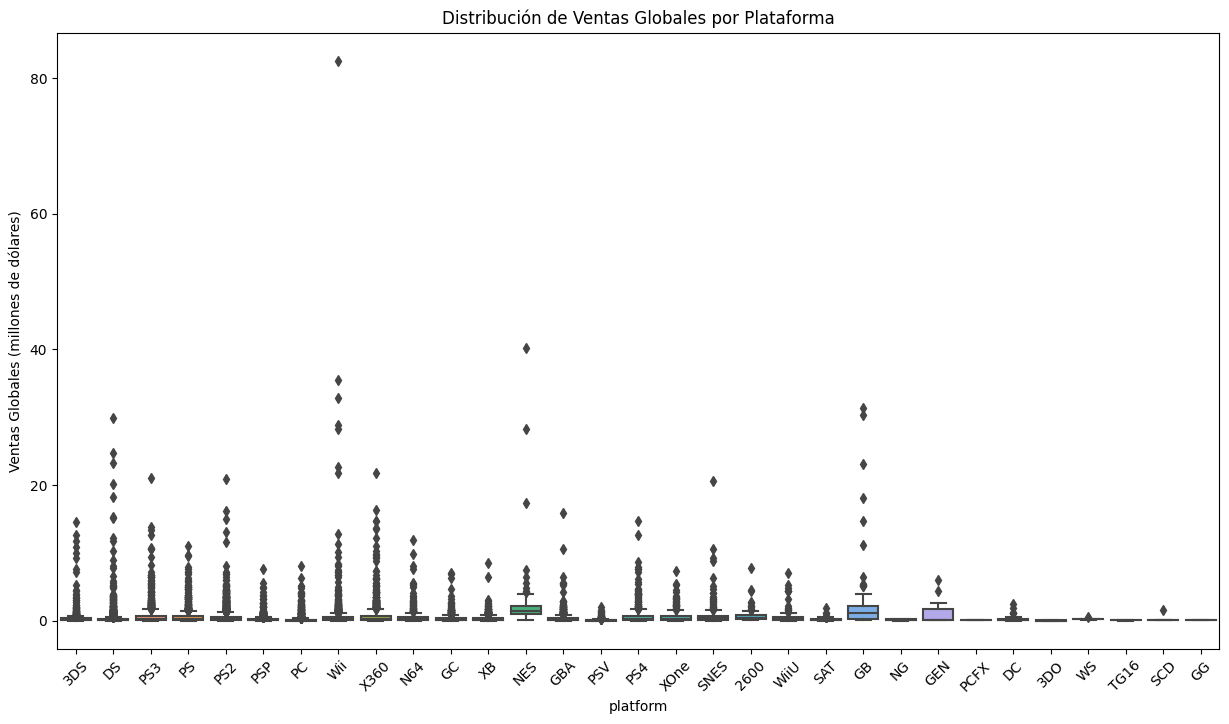

In [57]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=ventas_globales, x='platform', y='total_sales')
plt.xticks(rotation=45)
plt.title('Distribución de Ventas Globales por Plataforma')
plt.ylabel('Ventas Globales (millones de dólares)')
plt.show()


- - - DERIVADO DEL GRÁFICO ANTERIOR PODEMOS HACER LAS SIGUIENTES OBSERVACIONES:
LA DISTRIBUCIÓN DE VENTAS ES ASIMÉTRICA EN TODAS LAS PLATAFORMAS,LA MAYORIA DE LOS VIDEOJUEGOS PRESENTAN VENTAS GLOBALES BAJAS, MIENTRAS QUE HAY JUEGOS MUY EXITOSOS QUE SE REPRESENTAN POR LOS VALORES ATÍPICOS. LAS PLATAFORMAS DE NINTENDO DESTACAN POR SUS VALORES ATÍPICOS: Wii, DS, NES, SNES y Game Boy MUESTRAN VENTAS MUY SUPERIORES AL PROMEDIO DE MERCADO, ALCANZANDO MÁS DE 80 MILLONES VENDIDOS.
LAS PLATAFORMAS DE SONY Y MICROSOFT, TALES COMO PS2, PS3, PS4 y Xbox 360 MUESTRAN UN COMPORTAMIENTO MÁS ESTABLE, CON DISTRIBUCIONES MÁS CONCENTRADAS Y MENOS VALORES ATÍPICOS.
LAS PLATAFORMAS NES, GB Y GEN MUESTRAN UN VALOR DE MEDIANA ALTO A PESAR DE SER ANTIGUAS.


### CORRELACIÓN ENTRE RESEÑAS Y VENTAS

<AxesSubplot:title={'center':'Ventas totales según la crítica '}, xlabel='critic_score', ylabel='Total sales (millones dólares)'>

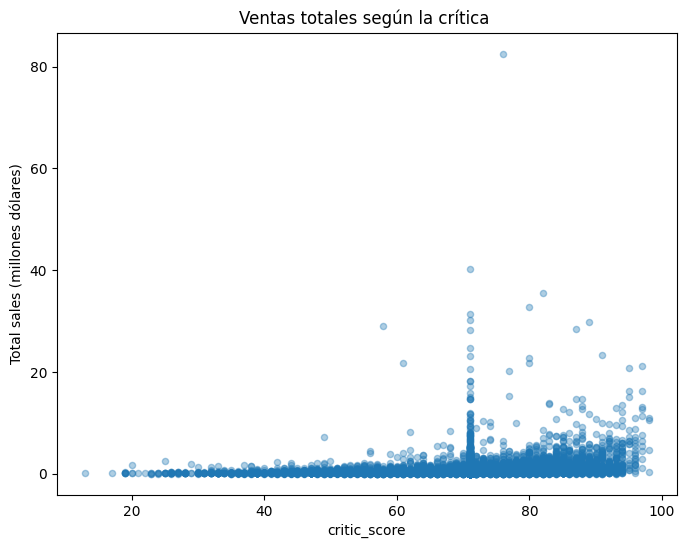

In [58]:

df_videogames.plot(x="critic_score",y="total_sales",kind="scatter", title="Ventas totales según la crítica ", alpha=0.36, figsize=(8,6), xlabel= "critic_score", ylabel="Total sales (millones dólares)")  # escribe tu código aquí

In [59]:
print(df_videogames['critic_score'].corr(df_videogames['total_sales']))

0.18977684368546088


In [60]:
print(df_videogames['user_score'].corr(df_videogames['total_sales']))

0.04876816640594138


- - - EL COEFICIENTE DE CORRELACIÓN ENTRE LA PUNTUACIÓN DE LA CRÍTICA Y DE LOS USUARIOS ES POSITIVO Y SE ACERCA A CERO,  LO CUAL SIGNIFICA QUE LAS CRÍCTICAS NO TIENEN UN IMPACTO SIGNIFICATIVO EN LAS VENTAS.

### GÉNEROS MÁS RENTABLES

In [61]:
top_5_genre=df_videogames.groupby("genre")["total_sales"].sum().reset_index().sort_values(by="total_sales",ascending=False)

In [62]:
df_videogames["genre"].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

<AxesSubplot:xlabel='total_sales', ylabel='genre'>

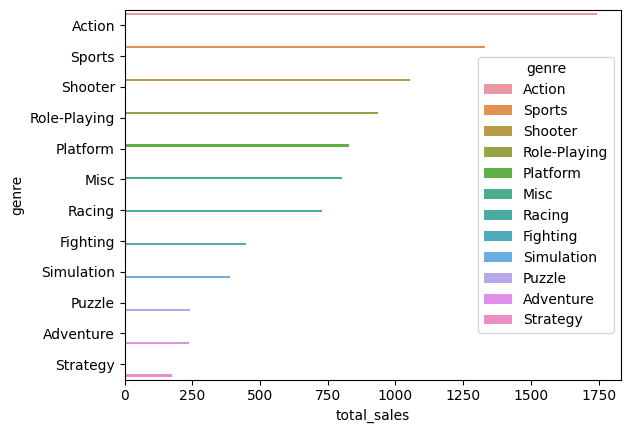

In [63]:
sns.barplot(data=top_5_genre[top_5_genre["total_sales"]>0],y="genre",x="total_sales",hue="genre")

- - - EL GÉNERO MÁS RENTABLE ES ACCIÓN, CON 1750 MILLONES DE DOLARES VENDIDOS; SEGUIDO POR DEPORTES, SHOOTER, ROLE PLAYING Y DE PLATAFORMAS.

## 4. PERFIL DE USUARIO POR REGIÓN

### REGION NORTEAMERICA

#### PLATAFORMAS PRINCIPALES

In [64]:
na_platform_sales=df_videogames.groupby(["platform"])["na_sales"].sum().reset_index()

In [65]:
top_na_platform=na_platform_sales.sort_values(by="na_sales",ascending=False).head()

In [66]:
top_na_platform

,platform,na_sales
28,X360,602.47
16,PS2,583.84
26,Wii,496.90
17,PS3,393.49
4,DS,382.40


E<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">EN NORTEAMERICA, LAS PLATAFORMAS PRINCIPALES SON: X360, PS2, WII, PS3 Y DS</strong>
</div>

#### GÉNEROS PRINCIPALES

In [67]:
na_genre_sales=df_videogames.groupby("genre")["na_sales"].sum().reset_index()

In [68]:
top_na_genre=na_genre_sales.sort_values(by="na_sales",ascending=False).head()

In [69]:
top_na_genre

,genre,na_sales
0,Action,879.01
10,Sports,684.43
8,Shooter,592.24
4,Platform,445.50
3,Misc,407.27


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">EN NORTEAMERICA, LOS GÉNEROS PRINCIPALES SON: ACCION, DEPORTES, SHOOTER, PLATAFORMAS Y OTROS VARIOS</strong>
</div>

#### CLASIFICACIONES ESRB

In [70]:
na_rating_sales=df_videogames.groupby("rating")["na_sales"].sum().reset_index()

In [71]:
top_rating_na=na_rating_sales.sort_values(by="na_sales",ascending=False).head()

In [72]:
top_rating_na

,rating,na_sales
1,E,1292.99
8,Unkown,1240.68
7,T,759.75
5,M,748.48
2,E10+,353.32


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">EN NORTEAMERCIA SE VENDEN MÁS LOS JUEGOS CON CLASIFICACIÓN E (EVERYONE)</strong>
</div>

### REGION EUROPA

#### PLATAFORMAS PRINCIPALES

In [73]:
eu_platform_sales=df_videogames.groupby(["platform"])["eu_sales"].sum().reset_index()

In [74]:
top_eu_platform=eu_platform_sales.sort_values(by="eu_sales",ascending=False).head()

In [75]:
top_eu_platform

,platform,eu_sales
16,PS2,339.29
17,PS3,330.29
28,X360,270.76
26,Wii,262.21
15,PS,213.61



<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">EN EUROPA LAS PLATAFORMAS PRINCIPALES SON: PS2, PS3, X360, WII Y PS</strong>
</div>


#### GÉNEROS PRINCIPALES

In [76]:
eu_genre_sales=df_videogames.groupby(["genre"])["eu_sales"].sum().reset_index()

In [77]:
top_eu_genre=eu_genre_sales.sort_values(by="eu_sales",ascending=False).head()

In [78]:
top_eu_genre

,genre,eu_sales
0,Action,519.13
10,Sports,376.79
8,Shooter,317.34
6,Racing,236.51
3,Misc,212.74


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">EN EUROPA LOS GÉNEROS PRINCIPALES SON: ACCION, DEPORTES, SHOOTER, RACING Y OTROS VARIOS</strong>
</div>


#### CLASIFICACIONES ESRB

In [79]:
eu_rating_sales=df_videogames.groupby("rating")["eu_sales"].sum().reset_index()

In [80]:
top_rating_eu=eu_rating_sales.sort_values(by="eu_sales",ascending=False).head()

In [81]:
top_rating_eu

,rating,eu_sales
1,E,710.25
8,Unkown,613.30
5,M,483.97
7,T,427.03
2,E10+,188.52


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">EN EUROPA SE VENDEN MÁS LOS JUEGOS CON CLASIFICACIÓN E (EVERYONE)</strong>
</div>

### REGIÓN JAPÓN

#### PLATAFORMAS PRINCIPALES

In [82]:
jp_platform_sales=df_videogames.groupby(["platform"])["jp_sales"].sum().reset_index()

In [83]:
top_jp_platform=jp_platform_sales.sort_values(by="jp_sales",ascending=False).head()

In [84]:
top_jp_platform

,platform,jp_sales
4,DS,175.57
15,PS,139.82
16,PS2,139.20
23,SNES,116.55
2,3DS,100.67


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">EN JAPÓN LAS PLATAFORMAS PRINCIPALES SON: DS, PS, PS2, SNES Y 3DS</strong>
</div>


#### GÉNEROS PRINCIPALES

In [85]:
jp_genre_sales=df_videogames.groupby(["genre"])["jp_sales"].sum().reset_index()

In [86]:
top_jp_genre=jp_genre_sales.sort_values(by="jp_sales",ascending=False).head()

In [87]:
top_jp_genre

,genre,jp_sales
7,Role-Playing,355.41
0,Action,161.43
10,Sports,135.54
4,Platform,130.83
3,Misc,108.11


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">EN JAPÓN, LOS GÉNEROS PRINCIPALES SON: ROLE PLAYING, ACCION, DEPORTES, PLATAFORMAS Y OTROS</strong>
</div>


#### CLASIFICACIONES ESRB

In [88]:
jp_rating_sales=df_videogames.groupby("rating")["jp_sales"].sum().reset_index()

In [89]:
top_rating_jp=jp_rating_sales.sort_values(by="jp_sales",ascending=False).head()

In [90]:
top_rating_jp

,rating,jp_sales
8,Unkown,841.93
1,E,198.11
7,T,151.40
5,M,64.24
2,E10+,40.20



<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">EN JAPÓN SE DESCONOCE EL TIPO DE CLASIFICACIÓN QUE MÁS VENDE, SIN EMBARGO LA SEGUNDA POSICIÓN CORRESPONDE A E (EVERYONE)</strong>
</div>



### COMPARACIÓN ENTRE REGIONES


#### PLATAFORMAS

In [91]:
df_concat_platform=pd.concat([eu_platform_sales,na_platform_sales,jp_platform_sales],axis="columns")

In [92]:
df_concat_platform.head()

,platform,eu_sales,platform,na_sales,platform,jp_sales
0,2600,5.47,2600,90.60,2600,0.00
1,3DO,0.00,3DO,0.00,3DO,0.10
2,3DS,61.48,3DS,83.49,3DS,100.67
3,DC,1.69,DC,5.43,DC,8.56
4,DS,188.89,DS,382.40,DS,175.57


In [93]:
# Renombrar todas las columnas para evitar confusión
df_concat_platform.columns = ['platform', 'eu_sales', 'platform_na', 'na_sales', 'platform_jp', 'jp_sales']
# Eliminar las columnas duplicadas
df_concat_platform_clean = df_concat_platform.drop(['platform_na', 'platform_jp'], axis=1)

In [94]:
df_concat_platform_clean

,platform,eu_sales,na_sales,jp_sales
0,2600,5.47,90.60,0.00
1,3DO,0.00,0.00,0.10
2,3DS,61.48,83.49,100.67
3,DC,1.69,5.43,8.56
4,DS,188.89,382.40,175.57
5,GB,47.82,114.32,85.12
6,GBA,75.25,187.54,47.33
7,GC,38.71,133.46,21.58
8,GEN,5.52,19.27,2.67
9,GG,0.00,0.00,0.04


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">EN ESTE DF SE PUEDE CONSULTAR LAS VENTAS DE CADA PLATAFORMA COMPARADAS POR REGIÓN</strong>
</div>



#### GÉNEROS

In [95]:
df_concat_genre=pd.concat([eu_genre_sales,na_genre_sales,jp_genre_sales],axis="columns")

In [96]:
df_concat_genre.head()

,genre,eu_sales,genre,na_sales,genre,jp_sales
0,Action,519.13,Action,879.01,Action,161.43
1,Adventure,63.54,Adventure,105.26,Adventure,52.30
2,Fighting,100.33,Fighting,223.36,Fighting,87.48
3,Misc,212.74,Misc,407.27,Misc,108.11
4,Platform,200.35,Platform,445.50,Platform,130.83


In [97]:
# Renombrar todas las columnas para evitar confusión
df_concat_genre.columns = ['genre', 'eu_sales', 'genre_na', 'na_sales', 'genre_jp', 'jp_sales']
# Eliminar las columnas duplicadas
df_genre_clean = df_concat_genre.drop(['genre_na', 'genre_jp'], axis=1)

In [98]:
df_genre_clean

,genre,eu_sales,na_sales,jp_sales
0,Action,519.13,879.01,161.43
1,Adventure,63.54,105.26,52.30
2,Fighting,100.33,223.36,87.48
3,Misc,212.74,407.27,108.11
4,Platform,200.35,445.50,130.83
5,Puzzle,50.01,122.87,57.31
6,Racing,236.51,359.35,56.71
7,Role-Playing,188.71,330.81,355.41
8,Shooter,317.34,592.24,38.76
9,Simulation,113.52,181.92,63.80


#### CLASIFICACION ESRB

In [99]:
df_concat_rating=pd.concat([eu_rating_sales,na_rating_sales,jp_rating_sales],axis="columns")

In [100]:
df_concat_rating

,rating,eu_sales,rating,na_sales,rating,jp_sales
0,AO,0.61,AO,1.26,AO,0.00
1,E,710.25,E,1292.99,E,198.11
2,E10+,188.52,E10+,353.32,E10+,40.20
3,EC,0.11,EC,1.53,EC,0.00
4,K-A,0.27,K-A,2.56,K-A,1.46
5,M,483.97,M,748.48,M,64.24
6,RP,0.08,RP,0.00,RP,0.00
7,T,427.03,T,759.75,T,151.40
8,Unkown,613.30,Unkown,1240.68,Unkown,841.93


In [101]:
df_concat_rating.columns = ['genre', 'eu_sales', 'genre_na', 'na_sales', 'genre_jp', 'jp_sales']
# Eliminar las columnas duplicadas
df_rating_clean = df_concat_rating.drop(['genre_na', 'genre_jp'], axis=1)

In [102]:
df_rating_clean

,genre,eu_sales,na_sales,jp_sales
0,AO,0.61,1.26,0.00
1,E,710.25,1292.99,198.11
2,E10+,188.52,353.32,40.20
3,EC,0.11,1.53,0.00
4,K-A,0.27,2.56,1.46
5,M,483.97,748.48,64.24
6,RP,0.08,0.00,0.00
7,T,427.03,759.75,151.40
8,Unkown,613.30,1240.68,841.93


## 5. PRUEBAS DE HIPÓTESIS

#### CALIFICACIONES PROMEDIO DE LOS USUARIOS PARA LAS PLATAFORMAS XBOX ONE Y PC


**HO: NO HAY DIFERENCIAS SIGNIFICATIVAS ENTRE LAS CALIFICACIONES PROMEDIO DE LOS USUARIOS PARA LAS PLATAFORMAS XBOX ONE Y PC
HA: SI HAY DIFERENCIAS SIGNIFICATIVAS ENTRE LAS CALIFICACIONES PROMEDIO DE LOS USUARIOS PARA LAS PLATAFORMAS XBOX ONE Y PC**


In [103]:

xone=df_videogames[df_videogames["platform"]=="XOne"]
xone


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,71.0,7.5,Unkown,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,71.0,6.6,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,71.0,7.5,Unkown,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,Unkown,0.01


In [104]:
df_videogames["platform"].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [105]:
pc=df_videogames[df_videogames["platform"]=="PC"]
pc


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.0,0.60,86.0,7.6,T,8.01
138,World of Warcraft,PC,2004,Role-Playing,0.08,6.21,0.0,0.00,93.0,7.3,T,6.29
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
195,Microsoft Flight Simulator,PC,1996,Simulation,3.22,1.69,0.0,0.20,71.0,7.5,Unkown,5.11
218,StarCraft II: Wings of Liberty,PC,2010,Strategy,2.57,1.68,0.0,0.58,93.0,8.2,T,4.83
...,...,...,...,...,...,...,...,...,...,...,...,...
16690,Pony Friends 2,PC,2009,Simulation,0.00,0.01,0.0,0.00,71.0,7.5,Unkown,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.0,0.00,80.0,7.6,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.0,0.00,61.0,5.8,T,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.0,0.00,60.0,7.2,E10+,0.01


In [106]:
alpha=0.05
result=st.ttest_ind(xone["user_score"],pc["user_score"],equal_var=False)
print('valor p:', result.pvalue) 
if (result.pvalue<alpha):# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 4.964162612622159e-05
Rechazamos la hipótesis nula


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">RECHAZAMOS LA HIPÓTESIS NULA YA QUE NO SE ENCONTRÓ EVIDENCIA QUE INDICARA QUE LAS CALIFICACIONES PROMEDIO DE LOS USUARIOS PARA XBOX ONE Y PC SEAN IGUALES</strong>
</div>


In [107]:
pc["user_score"]

85       7.6
138      7.3
192      4.0
195      7.5
218      8.2
        ... 
16690    7.5
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 974, dtype: float64

#### CALIFICACIONES PROMEDIO DE LOS USUARIOS PARA LOS GÉNEROS DE ACCIÓN Y DEPORTES


**HO: NO HAY DIFERENCIAS SIGNIFICATIVAS ENTRE LAS CALIFICACIONES PROMEDIO DE LOS USUARIOS PARA LOS GÉNEROS ACCION Y DEPORTES.
HA: SI HAY DIFERENCIAS SIGNIFICATIVAS ENTRE LAS CALIFICACIONES PROMEDIO DE LOS USUARIOS PARA LOS GÉNEROS DE ACCIÓN Y DEPORTES**


In [108]:

accion=df_videogames[df_videogames["genre"]=="Action"]
accion


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
...,...,...,...,...,...,...,...,...,...,...,...,...
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16694,Carmageddon 64,N64,1999,Action,0.01,0.00,0.00,0.00,71.0,7.5,Unkown,0.01
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.00,0.00,67.0,7.5,E,0.01
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,Unkown,0.01


In [109]:
df_videogames["genre"].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [110]:
deportes=df_videogames[df_videogames["genre"]=="Sports"]
deportes

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,71.0,7.5,Unkown,0.00
16688,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,71.0,7.5,T,0.01
16693,PGA European Tour,N64,2000,Sports,0.01,0.00,0.00,0.00,71.0,7.5,Unkown,0.01
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,71.0,7.5,Unkown,0.01


In [111]:
alpha=0.05
result=st.ttest_ind(accion["user_score"],deportes["user_score"],equal_var=False)
print('valor p:', result.pvalue) 
if (result.pvalue<alpha):# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.7159128316394157
No podemos rechazar la hipótesis nula


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
<strong style="color: darkblue;">LOS RESULTADOS INDICAN QUE NO PODEMOS RECHAZAR LA HIPÓTESIS NULA, LO CUAL SIGINFICA QUE NO SE ENCONTARON DIFERENCIAS SIGNIFICATIVAS ENTRE EL PROMEDIO DE CALIFICACION QUE DAN LOS USUARIOS A LOS GÉNEROS ACCIÓN Y DEPORTES</strong>
</div>


## 6. CONCLUSIÓN


EL ANÁLISIS EXPLORATORIO DEL DATASET DE VIDEOJUEGOS PERMITIÓ IDENTIFICAR PATRONES CLAVE EN LA EVOLUCIÓN TEMPORAL, EL DESEMPEÑO COMERCIAL POR PLATAFORMA Y LA DISTRIBUCIÓN REGIONAL DE LAS VENTAS. DESDE UNA PERSPECTIVA HISTÓRICA, AUNQUE LOS PRIMEROS REGISTROS DATAN DE 1980, LA INDUSTRIA MOSTRÓ UNA ACTIVIDAD LIMITADA HASTA 1993. A PARTIR DE 1994 SE OBSERVA UN CRECIMIENTO SOSTENIDO QUE SE ACELERA DESPUÉS DEL AÑO 2000, ALCANZANDO SU PUNTO MÁXIMO EN 2008 CON APROXIMADAMENTE 1,400 LANZAMIENTOS ANUALES, SEGUIDO POR UNA DISMINUCIÓN SIGNIFICATIVA QUE SUGIERE UNA ETAPA DE SATURACIÓN Y REESTRUCTURACIÓN DEL MERCADO.

EL ANÁLISIS DE VENTAS POR PLATAFORMA REVELA UNA DISTRIBUCIÓN ALTAMENTE ASIMÉTRICA, CON LA PRESENCIA DE NUMEROSOS VALORES ATÍPICOS QUE REPRESENTAN TÍTULOS CON VENTAS EXTRAORDINARIAS. ESTE COMPORTAMIENTO CONFIRMA QUE LA INDUSTRIA OPERA BAJO UN MODELO HIT-DRIVEN, DONDE UNA MINORÍA DE VIDEOJUEGOS CONCENTRA UNA PROPORCIÓN CONSIDERABLE DE LAS VENTAS TOTALES. EN ESTE CONTEXTO, PLAYSTATION 2 (PS2) SE POSICIONA COMO LA PLATAFORMA LÍDER EN VENTAS ACUMULADAS, MIENTRAS QUE EL ECOSISTEMA PLAYSTATION, EN SU CONJUNTO, MANTIENE UNA PRESENCIA DOMINANTE ENTRE LAS PLATAFORMAS MÁS VENDIDAS. XBOX 360 (X360), JUNTO CON WII Y NINTENDO DS, SE CONSOLIDA COMO ALTAMENTE COMPETITIVO, MIENTRAS QUE GBA, PS4, PSP Y PC PRESENTAN NIVELES DE VENTAS SIMILARES, CONFORMANDO UN SEGMENTO INTERMEDIO DEL MERCADO.

EL ANÁLISIS DE LA EVOLUCIÓN DE VENTAS MUESTRA QUE LAS PLATAFORMAS PRESENTAN UN CICLO DE VIDA PROMEDIO CERCANO A LOS DIEZ AÑOS, CARACTERIZADO POR UNA FASE INICIAL DE CRECIMIENTO, UN PUNTO MÁXIMO Y UN POSTERIOR DECLIVE. PS2 ALCANZA SU MÁXIMO EN SU QUINTO AÑO, WII EN SU CUARTO AÑO, Y TANTO PS3 COMO X360 EN SU SEXTO AÑO, MIENTRAS QUE PS4 SE ENCUENTRA ACTUALMENTE EN UNA FASE DE DISMINUCIÓN TRAS HABER ALCANZADO SU PICO EN 2015.

ASIMISMO, EL ANÁLISIS DE TÍTULOS MULTIPLATAFORMA EVIDENCIA UNA COMPETENCIA DIRECTA ENTRE PS3 Y X360, DONDE EL DESEMPEÑO COMERCIAL DE UN MISMO VIDEOJUEGO VARÍA SEGÚN LA PLATAFORMA. MIENTRAS GRAND THEFT AUTO V PRESENTA MAYORES VENTAS EN PS3, LA FRANQUICIA CALL OF DUTY DOMINA EN X360, LO QUE RESALTA LA INFLUENCIA DE LA BASE INSTALADA Y LAS PREFERENCIAS DEL USUARIO EN CADA ECOSISTEMA.

EL ANÁLISIS REGIONAL MUESTRA QUE NORTEAMÉRICA Y EUROPA CONCENTRAN LA MAYOR PARTE DE LAS VENTAS GLOBALES, MIENTRAS QUE JAPÓN PRESENTA UN COMPORTAMIENTO DIFERENCIADO, ALINEADO PRINCIPALMENTE CON PLATAFORMAS Y FRANQUICIAS LOCALES.

FINALMENTE, LAS PRUEBAS DE HIPÓTESIS SEÑALAN QUE EXISTEN DIFERENCIAS SIGNIFICATIVAS EN LAS CALIFICACIONES PROMEDIO DE LOS USUARIOS ENTRE LAS PLATAFORMAS XBOX ONE Y PC. EN CONTRASTE, AL COMPARAR LAS CALIFICACIONES PROMEDIO ENTRE LOS GÉNEROS ACCIÓN Y DEPORTES, NO SE PUEDE RECHAZAR LA HIPÓTESIS NULA, LO QUE INDICA QUE NO EXISTEN DIFERENCIAS ESTADÍSTICAMENTE SIGNIFICATIVAS EN LA PERCEPCIÓN DE LOS USUARIOS ENTRE DICHOS GÉNEROS.
